### 0. Giới thiệu Selenium

📌 Selenium Webdriver là một tool open source giúp việc thực thi các hành động lên trang web một cách tự động, tất nhiên là tùy vào mục đích và yêu cầu của người viết. Nó hỗ trợ viết script trên nhiều ngôn ngữ khác nhau: Python, Java, C#, PHP… nhưng trong buổi hôm nay này mình chỉ giới thiệu Selenium webdriver qua ngôn ngữ Python, vì mình chỉ biết Python. 😀

 **3 BƯỚC ĐƠN GIẢN ĐỂ BẠN CÓ THỂ CRAWL ĐƯỢC BẰNG SELENIUM**
- BƯỚC 1: đọc cái trang web lên
- BƯỚC 2: đọc thẻ HTML, tìm thẻ muốn tìm nó nằm ở đâu 🙂
- BƯỚC 3: đọc document của Selenium(nếu chưa thành thạo) và sử dụng lệnh thích hợp để lấy nội dung mình cần

*Có thể bạn chưa biết: Khi crawl bằng selenium phải đảm bảo là đường truyền của bạn ổn định nha, chứ không là không crawl được đâuuuu đó!!*

**Những trang web giúp bạn học selenium tốt hơn**
- https://www.guru99.com/selenium-tutorial.html
- https://www.selenium.dev/

**Test cript viết theo testcase**
- Để Selenium có thể mô phỏng hành động như *click chuột, điền giá trị,...* đầu tiên nó phải xác định được vị trí của element(phần tử) trên trang web mà nó tương tác ( dựa vào *css Selector hoặc Xpath*)
- Sau khi đã xác định được vị trí, thì sẽ xác định hành động đối với element đó.
- Sau khi hoàn thành 1 list các hành động theo trình tự, ta sẽ kiểm tra xem trang web có thực hiện đúng hay không

#### Có 2 cách để có thể sử dụng Selenium
- Cách 1: Cài đặt thư viện:
    - Cách này đơn giản và tiện lợi hơn nhiều.
    - Tuy nhiên, dễ quên cái lệnh install :v
- Cách 2: Tải chormedriver.exe:
    - Phải tải thêm và liên tục update nếu version của chorme trong máy bạn thay đổi.
    - Cách này thì không cần nhớ câu lệnh cài đặt ở trên làm gì  :>
    
Một số thuộc tính của By:
ID = "id"

NAME = "name"

XPATH = "xpath"

LINK_TEXT = "link text"

PARTIAL_LINK_TEXT = "partial link text"

TAG_NAME = "tag name"

CLASS_NAME = "class name"

CSS_SELECTOR = "css selector"


In [4]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# options = webdriver.ChromeOptions()

In [5]:
# pip install undetected-chromedriver

In [1]:
import undetected_chromedriver as uc
driver = uc.Chrome()

In [ ]:
# driver = webdriver.Chrome()
driver.set_window_size(1024, 600)
driver.maximize_window()
driver.get("https://www.goodreads.com/book/show/256683.City_of_Bones")
print(driver.page_source)  # results

#### CSS selectors là gì?
là 1 đoạn chuỗi String được thiết kế để xác định 1 hay nhiều elements trên 1 trang web bằng cách sử dụng các attributes hoặc dùng thứ tự cha – con của các elements trong DOM.
##### 1. Xác định theo ID
Sử dụng ID là lựa chọn ưu tiên vì 1 elements chỉ có 1 ID. Tuy nhiên, cũng có ngoại lệ
- 1 ID cho 2 elements khác nhau -- này là lỗi lập trình.
- ID động sẽ thay đổi sau mỗi lần load trang, hoặc 1 thời gian ví dụ : Facebook


In [13]:
from selenium.webdriver.common.by import By

In [14]:
driver.find_element(By.ID,"description").text

"When fifteen-year-old Clary Fray heads out to the Pandemonium Club in New York City, she hardly expects to witness a murder― much less a murder committed by three teenagers covered with strange tattoos and brandishing bizarre weapons. Then the body disappears into thin air. It's hard to call the police when the murderers are invisible to everyone else and when there is not"

##### 2. Xác định theo các attributes

Attribute là 1 tính chất của 1 elements. 1 element thì có rất nhiều loại tính chất 
- Id
- name
- class
....


In [6]:
driver.find_element(By.TAG_NAME ,'h1').text

'City of Bones'

In [15]:
driver.find_element(By.CSS_SELECTOR  ,'h1').text

'City of Bones'

In [16]:
driver.find_element(By.XPATH,'//h1').text

'City of Bones'

In [19]:
driver.find_element(By.CSS_SELECTOR, '.readable.stacked').text

"When fifteen-year-old Clary Fray heads out to the Pandemonium Club in New York City, she hardly expects to witness a murder― much less a murder committed by three teenagers covered with strange tattoos and brandishing bizarre weapons. Then the body disappears into thin air. It's hard to call the police when the murderers are invisible to everyone else and when there is not\n\n...more"

In [24]:
url = driver.find_element(By.XPATH, "//a[@class='bookTitle']").get_attribute('href')
driver.get(url)

##### 3. Click
Ấn click vào element có thuộc tính click()


In [16]:
driver.find_element(By.XPATH, "//span[@class='ContributorLink__name']").click()

##### 4. Input
Dùng để nhập dữ liệu vào text field. 

In [21]:
driver.find_element(By.XPATH, "//div[@class='searchBox searchBox--navbar']//input").send_keys('Catching Fire')

In [22]:
driver.find_element(By.XPATH, "//div[@class='searchBox searchBox--navbar']//button").click()

##### 5. Get_attribute

Có một số dạng như:
- src
- href
...

In [20]:
driver.find_element(By.XPATH,"//img[@itemprop='image']").get_attribute('src')

'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1586722941i/6148028._SY75_.jpg'

In [21]:
url_img = driver.find_elements(By.XPATH,"//img[@itemprop='image']")
list_url = [i.get_attribute('src') for i in url_img]
list_url[:3]

['https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1586722941i/6148028._SY75_.jpg',
 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1388367944i/20349441._SX50_.jpg',
 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1378827944i/17623910._SX50_.jpg']

In [22]:
import time
url_book = driver.find_elements(By.XPATH,"//a[@class='bookTitle']")
list_book = [i.get_attribute('href') for i in url_book]

In [23]:
for b in list_book[:3]:
    driver.get(b)
    time.sleep(2)

##### bảng so sánh CSS Selector và XPATH
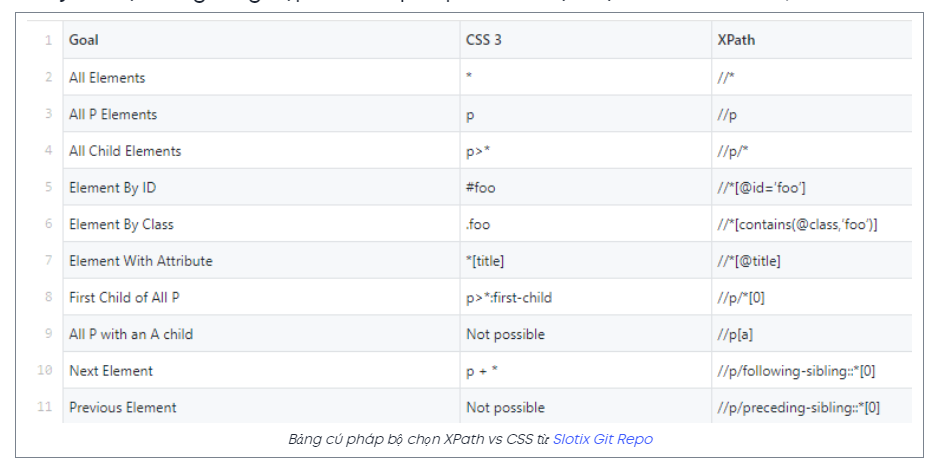

In [24]:
driver.find_element(By.XPATH, "//div[@class='BookPageMetadataSection']//div[4]").text

"Catching Fire, the New York Times bestseller by Suzanne Collins, is now a major motion picture -- and this is your guide to all of the movie's excitement, both in front of the camera and behind it.\n\nGo behind the scenes of the making of Catching Fire with exclusive materials, including back-stage photos and interviews. From the screenwriting process to the casting decisions, from the fantastic new sets and gorgeous costumes to the actors' performances and the director's vision, this is the definitive companion to the second Hunger Games film."

##### 6. Contains
là một phương thức được sử dụng trong biểu thức XPath. Nó được sử dụng khi giá trị của bất kỳ thuộc tính nào thay đổi động, ví dụ như thông tin đăng nhập.

In [25]:
driver.find_element(By.XPATH,"//*[contains(text(), 'Suzanne Collins')]").text

"Catching Fire, the New York Times bestseller by Suzanne Collins, is now a major motion picture -- and this is your guide to all of the movie's excitement, both in front of the camera and behind it.\n\nGo behind the scenes of the making of Catching Fire with exclusive materials, including back-stage photos and interviews. From the screenwriting process to the casting decisions, from the fantastic new sets and gorgeous costumes to the actors' performances and the director's vision, this is the definitive companion to the second Hunger Games film."

##### 7. Toán tử OR và ADD
**OR** hai điều kiện được sử dụng, cho dù điều kiện 1 HOẶC điều kiện thứ 2 có đúng không. Nó cũng được áp dụng nếu bất kỳ điều kiện nào là đúng hoặc có thể cả hai. Có nghĩa là bất kỳ điều kiện nào cũng đúng để tìm phần tử.

**AND** hai điều kiện được sử dụng, cả hai điều kiện phải đúng để tìm phần tử. Nó không tìm thấy phần tử nếu bất kỳ một điều kiện nào là sai.

In [30]:
driver.find_element(By.XPATH, "//*[h1 or @data-testid='bookTitle']").text

'The Hunger Games #2\nCatching Fire'

In [29]:
driver.find_element(By.XPATH, "//*[@class='Text Text__title1' and @data-testid='bookTitle']").text

'Catching Fire'

#### **CÓ LUYỆN TẬP MỚI THÀNH TÀI**

Bài tập crawl: 

- truy cập link sau: https://shopee.vn/
- Vào danh mục "Máy tính & Laptop"
- Lấy dữ liệu của 2 trang đầu $\Leftrightarrow$ 120 sản phẩm
- Trong mỗi sản phẩm:
    + link dẫn tới sản phẩm
    + Link image đại diện của sản phẩm
    + Tên sản phẩm
    + Gía sản phẩm
    + Lượng đánh giá của sản phẩm
    + Số sao
    + Số lượng bán
    + Mô tả sản phẩm
    + Crawl thêm cái khác nếu muốn :>

Chúc các bạn làm bài tập dui dẻ nho!!